In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Step 1: Load Dataset

import pandas as pd

# Load dataset
df = pd.read_csv('/kaggle/input/heart-disease-health-indicators-dataset-notebook/heart_disease_health_indicators_BRFSS2015.csv')  # or your dataset file

# View structure
print(df.head())
print(df.info())

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  I

In [4]:
print(df.columns)
print(df.index)

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
RangeIndex(start=0, stop=253680, step=1)


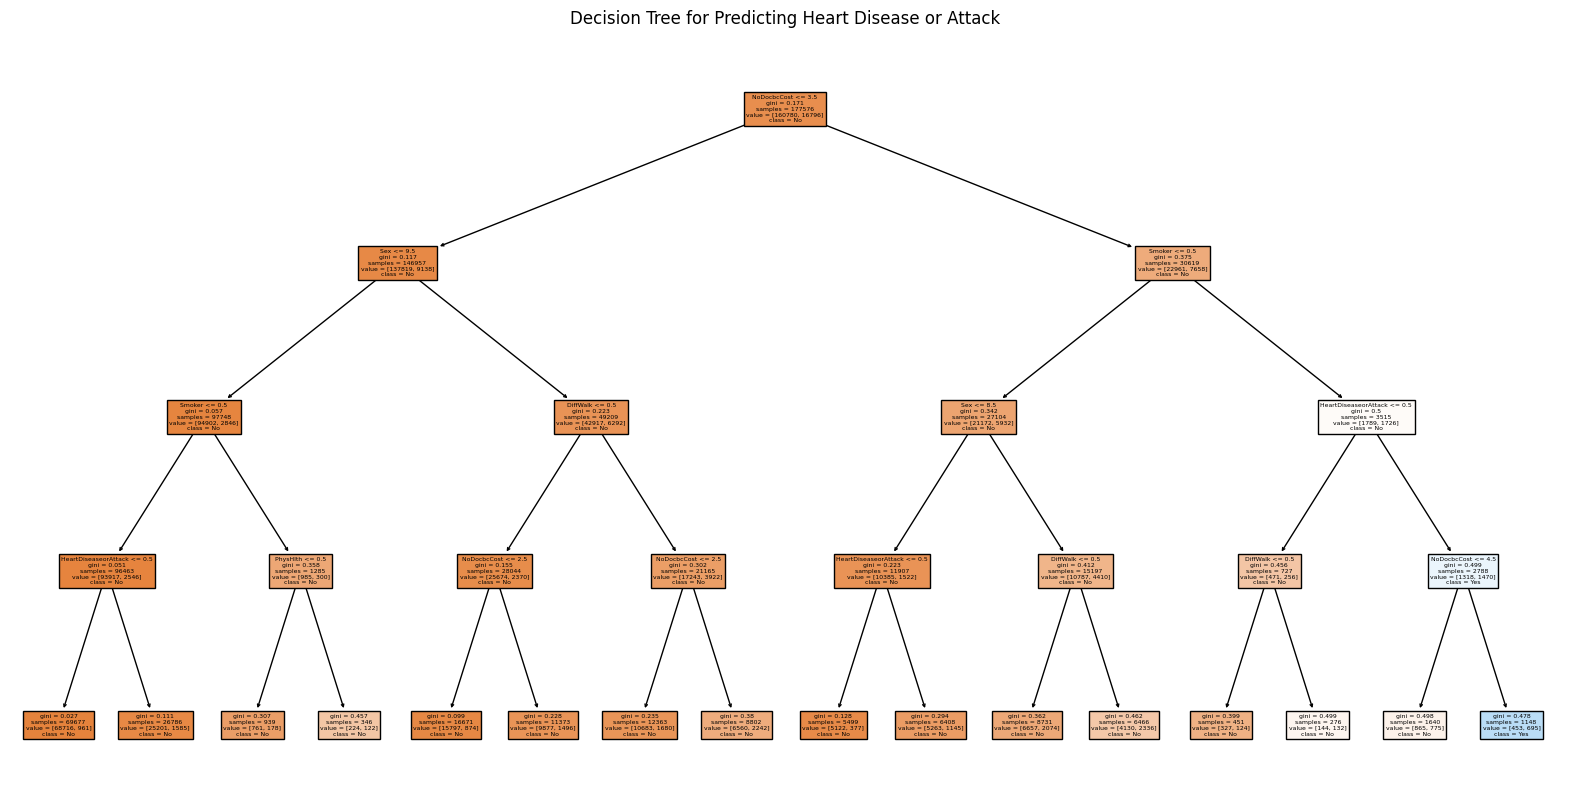

In [15]:
#step 2:train a decision Tree classifier&visulize the tree

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Drop rows with missing values (optional, based on data quality)
df = df.dropna()

# Set target and features
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

# Convert categorical columns to numeric (if any)
X = pd.get_dummies(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Plot tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=df.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree for Predicting Heart Disease or Attack")
plt.show()



In [16]:
#Step 3: Analyze Overfitting & Control Tree Depth

# Restrict max_depth
pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_tree.fit(X_train, y_train)

print("Train Accuracy:", pruned_tree.score(X_train, y_train))
print("Test Accuracy:", pruned_tree.score(X_test, y_test))

Train Accuracy: 0.9062711177186106
Test Accuracy: 0.9073373278671292


In [17]:
 #Step 4: Train Random Forest & Compare Accuracy

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

print("Random Forest Accuracy:", rf_clf.score(X_test, y_test))

Random Forest Accuracy: 0.9039340901923684


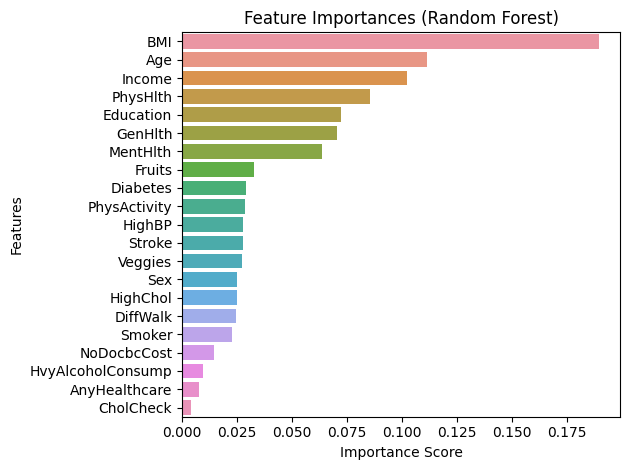

In [18]:
#Step 5: Feature Importance

import matplotlib.pyplot as plt
import seaborn as sns

# Importance
importances = rf_clf.feature_importances_
features = X.columns
forest_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
sns.barplot(x=forest_importance, y=forest_importance.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [22]:
#step 6:cross validation
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize model
clf = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)  # cv=5 for 5-fold

# Show scores
print("Cross-validation scores for each fold:", cv_scores)
print("Average CV Accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))



Cross-validation scores for each fold: [0.84973195 0.85237307 0.85140728 0.84809603 0.85117077]
Average CV Accuracy: 85.06%
